In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

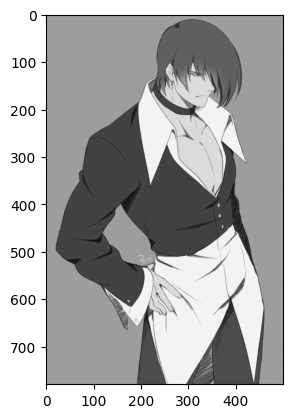

In [11]:
imgIY = plt.imread('IoriYagami.jpg')
grayIY = cv.cvtColor(imgIY, cv.COLOR_BGR2GRAY)
plt.imshow(grayIY, cmap='gray')

In [12]:
lowPassFilter = np.array([0.7, 0.7])
highPassFilter = np.array([-0.7, 0.7])
low = np.zeros((grayIY.shape[0]*2, grayIY.shape[1]), dtype=float)
high = np.zeros((grayIY.shape[0]*2, grayIY.shape[1]), dtype=float)
hasil = np.zeros((grayIY.shape[0]*2, grayIY.shape[1]*2), dtype=float)

In [13]:
newl = np.zeros((grayIY.shape[0], grayIY.shape[1]//2), dtype=float)
newh = np.zeros((grayIY.shape[0], grayIY.shape[1]//2), dtype=float)
newll = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
newlh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
newhl = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
newhh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)

In [14]:
for i in range(0, grayIY.shape[0], 1):
    for j in range(0, grayIY.shape[1], 2):
        newl[i, j//2] = (grayIY[i, j]*lowPassFilter[0]+grayIY[i, j+1]*lowPassFilter[1])/2
        newh[i, j//2] = (grayIY[i, j]*highPassFilter[0]+grayIY[i, j+1]*highPassFilter[1])/2

In [15]:
for i in range(0, newl.shape[0], 2):
    for j in range(0, newl.shape[1], 1):
        newll[i//2, j] = (newl[i, j]*lowPassFilter[0]+newl[i+1, j]*lowPassFilter[1])/2
        newlh[i//2, j] = (newl[i, j]*highPassFilter[0]+newl[i+1, j]*highPassFilter[1])/2
        newhl[i//2, j] = (newh[i, j]*lowPassFilter[0]+newh[i+1, j]*lowPassFilter[1])/2
        newhh[i//2, j] = (newh[i, j]*highPassFilter[0]+newh[i+1, j]*highPassFilter[1])/2

In [16]:
(iH, iW) = newll.shape[:2]
level1 = np.zeros((iH*2, iW*2))
for i in range(iH):
    for j in range(iW):
        level1[i,j] = newll[i,j]
        level1[i+iH, j] = newlh[i, j]
        level1[i, j+iW] = newhl[i, j]
        level1[i+iH, j+iW] = newhh[i, j]

(-0.5, 499.5, 779.5, -0.5)

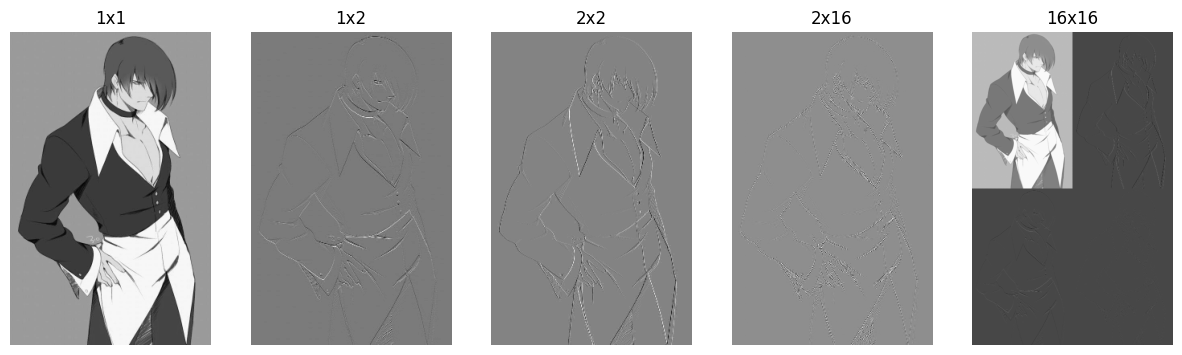

In [17]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.title('1x1')
plt.imshow(newll, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.title('1x2')
plt.imshow(newlh, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.title('2x2')
plt.imshow(newhl, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.title('2x16')
plt.imshow(newhh, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.title('16x16')
plt.imshow(level1, cmap='gray')
plt.axis('off')